In [1]:
import polars as pl
import seaborn as sns
import matplotlib.pyplot as plt

scrape_questions_and_answers_df =  pl.read_parquet('../data/all_questions_and_answer.parquet')

## Data Analysis

We scraped 9941 questions and answers from Avvo.

In [13]:
scrape_questions_and_answers_df.group_by('number').len().shape[0]

9941

Number of valid scraped questions

In [19]:
scrape_questions_and_answers_df.filter(pl.col('title') != 'Not Found').group_by('number').len().shape[0]


3074

Number of invalid scraped questions

In [18]:
scrape_questions_and_answers_df.filter(pl.col('title') == 'Not Found').shape[0]

3074

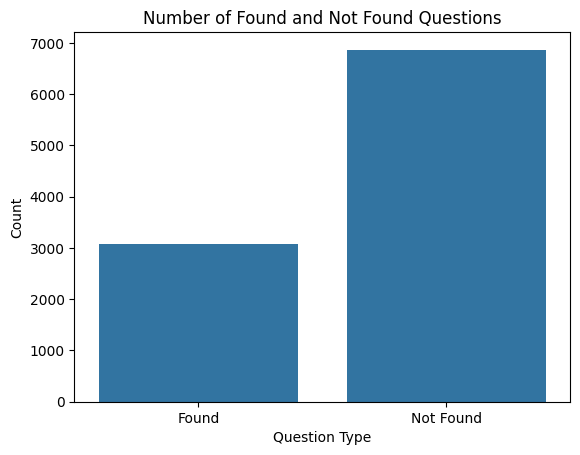

In [32]:
found_count = scrape_questions_and_answers_df.filter(pl.col('title') != 'Not Found').group_by('number').len().shape[0]
not_found_count = scrape_questions_and_answers_df.filter(pl.col('title') == 'Not Found').shape[0]

# Create a DataFrame with the counts
data = pl.DataFrame({
    'Question Type': ['Found', 'Not Found'],
    'Count': [found_count, not_found_count]
})

# Create the bar plot
sns.barplot(x='Question Type', y='Count', data=data)
plt.title('Number of Found and Not Found Questions')
plt.show()

<Axes: xlabel='posted_times', ylabel='len'>

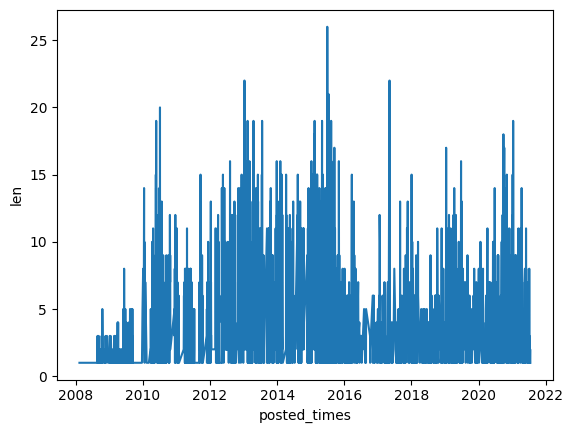

In [31]:
time_line_df = scrape_questions_and_answers_df.filter(pl.col('title') != 'Not Found').group_by('posted_times').len().sort('posted_times')

sns.lineplot(time_line_df, x='posted_times', y='len')

In [9]:
toscrape_df = scrape_questions_and_answers_df.filter(pl.col('title') != 'Not Found').select('number','url').unique().sort('number')[0:200]

toscrape_list_of_tuples = list(map(tuple, toscrape_df.to_numpy()))
toscrape_list_of_tuples

[(0,
  'https://www.avvo.com/legal-answers/a-company-assigned-by-ssa-to-pay-my-bills--5292528.html'),
 (1,
  'https://www.avvo.com/legal-answers/high-credit-card-balance-consolidation-offer---5291918.html'),
 (2,
  'https://www.avvo.com/legal-answers/in-chapter-7-bankruptcy--can-the-irs-and-ca-ftb-of-5285545.html'),
 (3,
  'https://www.avvo.com/legal-answers/can-a-bankruptcy-be-discharged-or-forgiven-before--5282967.html'),
 (4,
  'https://www.avvo.com/legal-answers/does-the-statute-of-limitations-on-debt-restart-to-5281131.html'),
 (5,
  'https://www.avvo.com/legal-answers/publicizing-court-filings--5276531.html'),
 (6,
  'https://www.avvo.com/legal-answers/is-there-a-duty-to-correct-the-court-record-after--5270817.html'),
 (7,
  'https://www.avvo.com/legal-answers/how-can-i-remove-a-lien-on-my-property--5269448.html'),
 (8,
  'https://www.avvo.com/legal-answers/can-the-executor-of-a-will-going-through-probate-s-5267278.html'),
 (9,
  'https://www.avvo.com/legal-answers/do-you-have-to